## equation for hv' (compton scattering) 
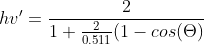

In [1]:
import numpy as np
from sympy import symbols
import math
import cmath 

import matplotlib as mpl
from matplotlib import pyplot as plt 

from scipy.stats import norm
import seaborn as sb 

import lmfit as lf
import scipy.optimize as opt 

from scipy.optimize import curve_fit 

In [8]:
math.pi 
print(math.pi) 
math.cos 
print(math.cos)

3.141592653589793
<built-in function cos>


In [20]:
# Equation set up  
mev=2 
x=np.linspace(0,math.pi) 
math.acos(x)
hv=mev/1+(mev/0.511)*(1-cos(x))

TypeError: only size-1 arrays can be converted to Python scalars